<a href="https://colab.research.google.com/github/Sanjeevi-Kumar/AI_hackthon/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
from transformers import pipeline,BertForSequenceClassification,BertTokenizerFast

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset/train.csv')

In [ ]:
data

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...


In [ ]:
data.describe()

,category,sub_category,crimeaditionalinfo
count,93686,87095,93665
unique,15,35,85013
top,Online Financial Fraud,UPI Related Frauds,Respected Sir\r\n\r\nA very serious matter I w...
freq,57434,26856,2342


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [ ]:
data=data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87074 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            87074 non-null  object
 1   sub_category        87074 non-null  object
 2   crimeaditionalinfo  87074 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


In [ ]:
labels=data["sub_category"].unique().tolist()
labels=[i.strip() for i in labels]
labels

['Cyber Bullying  Stalking  Sexting',
 'Fraud CallVishing',
 'Online Gambling  Betting',
 'Online Job Fraud',
 'UPI Related Frauds',
 'Internet Banking Related Fraud',
 'Other',
 'Profile Hacking Identity Theft',
 'DebitCredit Card FraudSim Swap Fraud',
 'EWallet Related Fraud',
 'Data Breach/Theft',
 'Cheating by Impersonation',
 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks',
 'FakeImpersonating Profile',
 'Cryptocurrency Fraud',
 'Malware Attack',
 'Business Email CompromiseEmail Takeover',
 'Email Hacking',
 'Hacking/Defacement',
 'Unauthorised AccessData Breach',
 'SQL Injection',
 'Provocative Speech for unlawful acts',
 'Ransomware Attack',
 'Cyber Terrorism',
 'Tampering with computer source documents',
 'DematDepository Fraud',
 'Online Trafficking',
 'Online Matrimonial Fraud',
 'Website DefacementHacking',
 'Damage to computer computer systems etc',
 'Impersonating Email',
 'EMail Phishing',
 'Ransomware',
 'Intimidating Email',
 'Against Interest of 

In [ ]:
num_label=len(labels)
id_2_label={idx:label for idx,label in enumerate(labels)}
label_2_id={label:idx for idx,label in enumerate(labels)}

In [ ]:
label_2_id

{'Cyber Bullying  Stalking  Sexting': 0,
 'Fraud CallVishing': 1,
 'Online Gambling  Betting': 2,
 'Online Job Fraud': 3,
 'UPI Related Frauds': 4,
 'Internet Banking Related Fraud': 5,
 'Other': 6,
 'Profile Hacking Identity Theft': 7,
 'DebitCredit Card FraudSim Swap Fraud': 8,
 'EWallet Related Fraud': 9,
 'Data Breach/Theft': 10,
 'Cheating by Impersonation': 11,
 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks': 12,
 'FakeImpersonating Profile': 13,
 'Cryptocurrency Fraud': 14,
 'Malware Attack': 15,
 'Business Email CompromiseEmail Takeover': 16,
 'Email Hacking': 17,
 'Hacking/Defacement': 18,
 'Unauthorised AccessData Breach': 19,
 'SQL Injection': 20,
 'Provocative Speech for unlawful acts': 21,
 'Ransomware Attack': 22,
 'Cyber Terrorism': 23,
 'Tampering with computer source documents': 24,
 'DematDepository Fraud': 25,
 'Online Trafficking': 26,
 'Online Matrimonial Fraud': 27,
 'Website DefacementHacking': 28,
 'Damage to computer computer systems etc

In [ ]:
id_2_label

{0: 'Cyber Bullying  Stalking  Sexting',
 1: 'Fraud CallVishing',
 2: 'Online Gambling  Betting',
 3: 'Online Job Fraud',
 4: 'UPI Related Frauds',
 5: 'Internet Banking Related Fraud',
 6: 'Other',
 7: 'Profile Hacking Identity Theft',
 8: 'DebitCredit Card FraudSim Swap Fraud',
 9: 'EWallet Related Fraud',
 10: 'Data Breach/Theft',
 11: 'Cheating by Impersonation',
 12: 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks',
 13: 'FakeImpersonating Profile',
 14: 'Cryptocurrency Fraud',
 15: 'Malware Attack',
 16: 'Business Email CompromiseEmail Takeover',
 17: 'Email Hacking',
 18: 'Hacking/Defacement',
 19: 'Unauthorised AccessData Breach',
 20: 'SQL Injection',
 21: 'Provocative Speech for unlawful acts',
 22: 'Ransomware Attack',
 23: 'Cyber Terrorism',
 24: 'Tampering with computer source documents',
 25: 'DematDepository Fraud',
 26: 'Online Trafficking',
 27: 'Online Matrimonial Fraud',
 28: 'Website DefacementHacking',
 29: 'Damage to computer computer systems

In [ ]:
 data["labels"]=data.sub_category.map(lambda x: label_2_id[x.strip()])

<ipython-input-12-cde30818e5d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["labels"]=data.sub_category.map(lambda x: label_2_id[x.strip()])


<Axes: ylabel='count'>

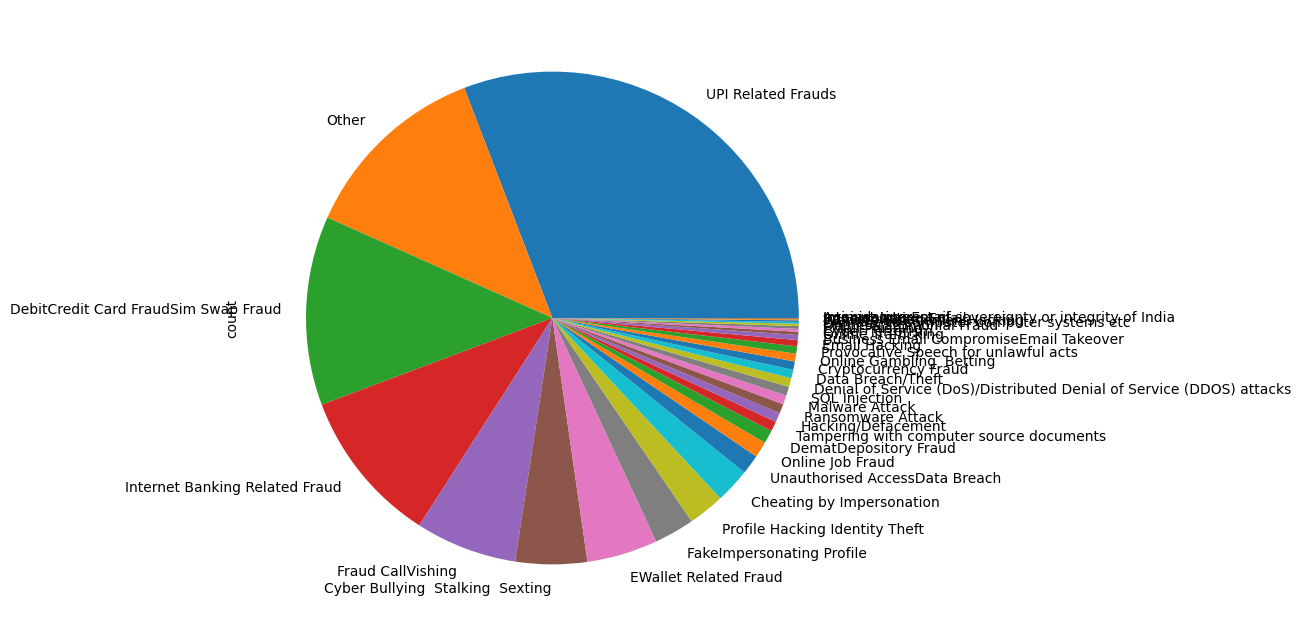

In [ ]:
data.sub_category.value_counts().plot(kind="pie",figsize=(8,8))

In [ ]:
tokenizer=BertTokenizerFast.from_pretrained('dbmdz/bert-base-turkish-uncased',max_length=512)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/263k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

In [ ]:
model=BertForSequenceClassification.from_pretrained('dbmdz/bert-base-turkish-uncased',num_labels=num_label,id2label=id_2_label,label2id=label_2_id)
model.to("cpu")

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
test_data=pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
test_data.dropna()

,category,sub_category,crimeaditionalinfo
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...
5,Online Financial Fraud,Internet Banking Related Fraud,My salary of amount has to be credited to my ...
...,...,...,...
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...
31226,Any Other Cyber Crime,Other,Mai Bibekbraj maine pahle ki complain kar chuk...
31227,Online Financial Fraud,Internet Banking Related Fraud,received URL link for updating KYC from mobile...


In [ ]:
test_data=test_data.dropna()

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28987 entries, 1 to 31228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            28987 non-null  object
 1   sub_category        28987 non-null  object
 2   crimeaditionalinfo  28987 non-null  object
dtypes: object(3)
memory usage: 905.8+ KB


In [ ]:
test_labels=test_data["sub_category"].unique().tolist()
test_labels=[i.strip() for i in test_labels]
test_labels

['DebitCredit Card FraudSim Swap Fraud',
 'SQL Injection',
 'Fraud CallVishing',
 'Other',
 'Internet Banking Related Fraud',
 'Unauthorised AccessData Breach',
 'UPI Related Frauds',
 'Damage to computer computer systems etc',
 'Cheating by Impersonation',
 'Malware Attack',
 'EWallet Related Fraud',
 'EMail Phishing',
 'Profile Hacking Identity Theft',
 'Data Breach/Theft',
 'FakeImpersonating Profile',
 'Email Hacking',
 'Online Job Fraud',
 'Cyber Bullying  Stalking  Sexting',
 'Hacking/Defacement',
 'Cryptocurrency Fraud',
 'Online Matrimonial Fraud',
 'Tampering with computer source documents',
 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks',
 'DematDepository Fraud',
 'Provocative Speech for unlawful acts',
 'Online Gambling  Betting',
 'Ransomware Attack',
 'Business Email CompromiseEmail Takeover',
 'Online Trafficking',
 'Cyber Terrorism',
 'Impersonating Email',
 'Website DefacementHacking',
 'Ransomware',
 'Computer Generated CSAM/CSEM',
 'Intimidati

In [ ]:
test_num_label=len(test_labels)
test_id_2_label={idx:label for idx,label in enumerate(test_labels)}
test_label_2_id={label:idx for idx,label in enumerate(test_labels)}

In [ ]:
 test_data["labels"]=test_data.sub_category.map(lambda x: test_label_2_id[x.strip()])

**splitting of data**


In [ ]:
 len_of_train=data.shape[0]
 len_of_test=test_data.shape[0]
 train_text=list(data.crimeaditionalinfo.values)
 train_labels=list(data.labels.values)
 test_text=list(test_data.crimeaditionalinfo.values)
 test_labels=list(test_data.labels.values)

In [ ]:
len(train_text),len(test_text)

(87074, 28987)

In [ ]:
train_encodings=tokenizer(train_text,truncation=True,padding=True)
test_encodings=tokenizer(test_text,truncation=True,padding=True)

In [ ]:
class Dataloader:
  def __init__(self,encodings,labels):
    self.encodings=encodings
    self.labels=labels
  def __getitem__(self,idx):
    item={key:torch.tensor(val[idx]) for key,val in self.encodings.items()}
    item["labels"]=torch.tensor(self.labels[idx])
    return item
  def __len__(self):
    return len(self.labels)

In [ ]:
train_dataset=Dataloader(train_encodings,train_labels)
test_dataset=Dataloader(test_encodings,test_labels)

**Training**

In [ ]:
from transformers import Trainer,TrainingArguments

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def compute_metrics(pred):
  labels=pred.label_ids
  preds=pred.predictions.argmax(-1)
  precision,recall,f1,_ = precision_recall_fscore_support(labels,preds,average="macro")
  acc=accuracy_score(labels,preds)
  return {
      "accuracy":acc,
      "f1":f1,
      "precision":precision,
      "recall":recall
  }

In [ ]:
training_args=TrainingArguments(
    output_dir="./results",
    do_train=True,
    do_eval=True,
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=50,
    weight_decay=0.01,
    logging_strategy='steps',
    logging_dir="./logs",
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    fp16=True,
    load_best_model_at_end=True)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer=Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: ERROR API key must be 40 characters long, yours was 15


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
